In [2]:
#======================= import essential libraries===========================
import os
import sys
import numpy as np
import matplotlib.tri as mtri
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import interpolate
from python_vtu import vtu_extract_element_connectivity,vtu_extract_fields

def bed(x):
    return 0.5*(np.abs(200-0.02*x)+(200-0.02*x))
def bedrock(x):
    return (200-0.02*x)

# ocean tide
def semi_diurnal_tide(t):
    SLC = np.sin(2*np.pi*t/T)  # tidal frequency of 2 per day
    return SLC
def neap_spring_tide(t):
    return 1.0/2.498*np.sin(2.0*np.pi*t/(0.5*3.154e7/12.0/30.0))\
            +1.5/2.498*1.0*np.sin(2.0*np.pi*t*12.42/12/(0.5*3.154e7/12.0/30.0))

sys.path.append("../")
#======================= Input parameters =========================
Hght = 500                   # Height(m)
Lngth = 2e4                  # Lngth(m)               
tol = 1e-3                   # Tolerance(m)
T = 0.5*3.154e7/(12.0*30.0)  # solar tide period
sea_level = Hght*0.917       # sea level(m)
r_lake = 0.5e3               # range of maximum stress (m)

# plot settings
fs = 15                      # FontSize
marker = 6                   # MarkerType

#======================= read the data ===========================
casename = 'stokes_tidal_response_U17ma_L20000_Slope2e_2_A1e_25_n3_0_mu0_30e9_deltap1e_14_deltav1e_18_C1_2e7_DX25_tide1_00'
filename = "../results/"+ casename
path = filename + "/line_plot_data"
listName = os.listdir(path)
for files in listName:
    if files[-4:]=='.txt':
        continue
    else:
        txtName = files + '.txt'
        os.rename(os.path.join(path,files), os.path.join(path,txtName))
        
X = np.loadtxt(filename+"/line_plot_data/X.txt", dtype='f', delimiter=' ')
Gamma_h = np.loadtxt(filename+"/line_plot_data/Gamma_h.txt", dtype='f', delimiter=' ')
Gamma_s = np.loadtxt(filename+"/line_plot_data/Gamma_s.txt", dtype='f', delimiter=' ')
t = np.loadtxt(filename+"/line_plot_data/t.txt", dtype='f', delimiter=' ')
x_left = np.loadtxt(filename+"/line_plot_data/x_left.txt", dtype='f', delimiter=' ')
x_right = np.loadtxt(filename+"/line_plot_data/x_right.txt", dtype='f', delimiter=' ')
s_mean = np.loadtxt(filename+"/line_plot_data/s_mean.txt", dtype='f', delimiter=' ')
max_tension = np.loadtxt(filename +'/max_tension.txt', dtype='f', delimiter=',')           # tau_xx,max
max_tension_net = np.loadtxt(filename +'/max_tension_net.txt', dtype='f', delimiter=',')   # sigma_xx,max# 
max_tension_xcoord = np.loadtxt(filename +'/max_tension_x.txt', dtype='f', delimiter=',')  

#point fields 1
  pointFields.name stress
#cell fields 0
#point fields 1
  pointFields.name stress
#cell fields 0
#point fields 1
  pointFields.name stress
#cell fields 0
#point fields 1
  pointFields.name stress
#cell fields 0


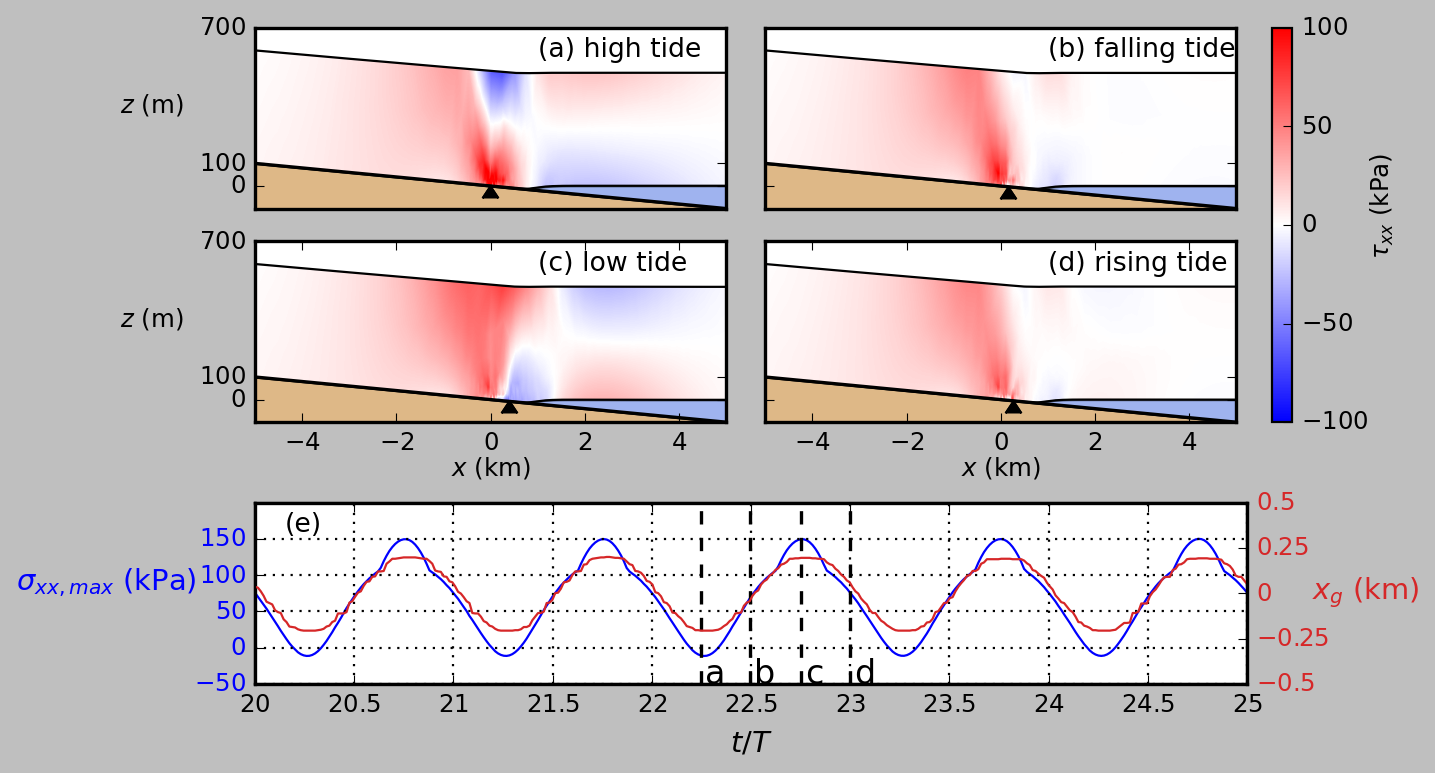

In [5]:
# t = t[:1801]
# x_left = x_left[:1801]
#=========================== Figure 2 ==============================
# frame number
na = np.argmin(abs(t/T-22.25))        # panel(a)        
nb = np.argmin(abs(t/T-22.5))         # panel(b)
nc = np.argmin(abs(t/T-22.75))        # panel(c)
nd = np.argmin(abs(t/T-23.00))        # panel(d)
ne = np.argmin(abs(t/T-23.25))        # panel(e)

# na = np.argmin(abs(t/T-1e4))        # panel(a)        
# nb = np.argmin(abs(t/T-1.5e4))         # panel(b)
# nc = np.argmin(abs(t/T-2e4))        # panel(c)
# nd = np.argmin(abs(t/T-2.5e4))        # panel(d)

Book = np.array([na,nb,nc,nd])
labels = ['(a) high tide','(b) falling tide','(c) low tide','(d) rising tide']

fig,axes = plt.subplots(figsize=(8,5),nrows=3, ncols=2, constrained_layout=False)
plt.rcParams["figure.dpi"] = 600
plt.style.use('classic')
%config InlineBackend.figure_format = 'retina' # make high res plots for retina 5k displays

# stress plots from panel a to panel d
for i in range(1,5):
    n_frame = Book[i-1]
    ax=plt.subplot(320+i)
    if i==1 or i==3: 
        plt.annotate(labels[i-1],xy=(11.0e3,570),fontsize=fs-3)
    else:
        plt.annotate(labels[i-1],xy=(11.0e3,570),fontsize=fs-3)
        
    #---------------------------- read data --------------------------------
    n_frame_str="{:0>6d}".format(n_frame)
    e2v = vtu_extract_element_connectivity(filename+"/field_plot_data/sigma"+n_frame_str+".vtu")
    pf, cf, coor = vtu_extract_fields(filename+"/field_plot_data/sigma"+n_frame_str+".vtu")
    pf_names = list(pf.keys())
    cf_names = list(cf.keys())
    

    # get upper and lower surface profile
    kind='linear'
    x_top=interpolate.interp1d(X,Gamma_h[:,n_frame],kind=kind)
    x_bed=interpolate.interp1d(X,Gamma_s[:,n_frame],kind=kind)
    bed_data=x_bed(coor['coor'][:,0])
    top_data=x_top(coor['coor'][:,0])

    # z coordinate
    z = coor['coor'][:,1]
    
    #------------------------- Stress field ----------------------------
    norm = mpl.colors.Normalize(vmin=-1.0e2, vmax=1.0e2)
    cmap = mpl.cm.bwr # colormap
    tri = mtri.Triangulation(coor['coor'][:, 0], coor['coor'][:, 1], e2v) # trangulation
    plt.tricontourf(tri, pf[pf_names[0]][:,0]/1e3, levels=1000, cmap=cmap, norm=norm) # contour

    #---------------------------- color --------------------------------
    # color fill
    plt.fill_between(X,bedrock(X),Gamma_s[:,n_frame],facecolor='royalblue',alpha=0.5)
    plt.fill_between(X,-1000*np.ones(np.size(X)),bedrock(X),facecolor='burlywood',alpha=1.0)
    # bedrock
    plt.plot(X,bedrock(X),color='k',linewidth=1.5,label=r'$\beta$')
    # ice-water interface
    plt.plot(X[(Gamma_s[:,n_frame]-bedrock(X)>tol)&(X>=x_right[n_frame])],\
             Gamma_s[:,n_frame][(Gamma_s[:,n_frame]-bedrock(X)>tol)&(X>=x_right[n_frame])],\
             color='k',linewidth=1.0,label=r'$s>\beta$')
    # surface
    plt.plot(X,Gamma_h[:,n_frame],color='k',linewidth=1.0,label=r'$h$')
    
    #-------------------------- grounding line --------------------------
    # left GL
    line1 = ax.scatter(x_left[n_frame], bedrock(x_left[n_frame]), marker=marker, c='k', s=50)
    # right GL
    ax.scatter(x_right[n_frame], bedrock(x_left[n_frame]), marker=marker, c='k', s=50)
    
    #---------------------------- y axis --------------------------------
    if i==1 or i==3:
        plt.yticks([0,100,700],[r'$0$',r'$100$',r'$700$'],\
                   fontsize=fs-4, math_fontfamily='dejavusans')
        plt.ylabel(r'$z$ (m)',fontsize=fs-4, rotation=0, math_fontfamily='dejavusans')
        ax.yaxis.set_label_coords(-0.22, 0.50)
    else:
        plt.yticks([0,100,700],[r'$0$',r'$100$',r'$700$'],\
                   fontsize=fs-4, math_fontfamily='dejavusans')
        plt.gca().get_yaxis().set_ticklabels([])
    #---------------------------- x axis --------------------------------
    if i >2:
        if i==3:
            plt.xlabel(r'$x$ (km)',fontsize=fs-4, math_fontfamily='dejavusans')
            plt.xticks(2*np.array([0.0e3,1.0e3,2e3,3.0e3,4e3,5.0e3,6e3,7.0e3,8e3,9.0e3,10e3]),\
                       [r'$-10$',r'$-8$',r'$-6$',r'$-4$',r'$-2$',r'$0$',r'$2$',r'$4$',r'$6$',r'$8$',r'$10$'],\
                       fontsize=fs-4, math_fontfamily='dejavusans')
            ax.xaxis.set_label_coords(0.5, -0.18)
        else:
            plt.xlabel(r'$x$ (km)',fontsize=fs-4, math_fontfamily='dejavusans')
            plt.xticks(2*np.array([0.0e3,1.0e3,2e3,3.0e3,4e3,5.0e3,6e3,7.0e3,8e3,9.0e3,10e3]),\
                       [r'$-10$',r'$-8$',r'$-6$',r'$-4$',r'$-2$',r'$0$',r'$2$',r'$4$',r'$6$',r'$8$',r'$10$'],\
                       fontsize=fs-4, math_fontfamily='dejavusans')
            ax.xaxis.set_label_coords(0.5, -0.18)
    else:
        plt.xticks(2*np.array([0,2,4,6,8,10]),['','','','','',''],fontsize=fs-4)
        
    plt.ylim(-100,700.0,8)
    plt.xlim(0.25*Lngth,0.75*Lngth)

    for spine in ax.spines.values():
        spine.set_linewidth(1.5)
    
# =========================== Time Series ===============================
ax = plt.subplot(3,2,(5,6))
tide_peak = 0.25 + np.arange(150)*1.0
tide_valley = 0.75 + np.arange(150)*1.0  
ax.plot(t/T,max_tension_net/1e3,color='b')   

# Mark panel (a)-(d) on panel (e)
panel_label=['a','b','c','d']
for count,j in enumerate([na,nb,nc,nd]):
    jindex = np.argmin(abs(t-t[j]/T))
    line2 = ax.axvline(x=t[j]/T,ymax=2.5e5,linestyle='--',color='k',linewidth=1.5,label='high tide')
    plt.annotate(panel_label[count],xy=(t[j]/T+0.02,-50),fontsize=fs)

# ---------------------- y axis ----------------------
plt.yticks([-100,-50,0,0.5e2,1e2,1.5e2],\
           [r'$-100$',r'$-50$',r'$0$',r'$50$',r'$100$',r'$150$'],\
           fontsize=fs-4,color='b', math_fontfamily='dejavusans')

ax.set_ylabel(r'$\sigma_{xx,max}$ (kPa)',fontsize=fs-2,\
              rotation=0, color='b', math_fontfamily='dejavusans')
ax.yaxis.set_label_coords(-0.15, 0.47)
ax.set_ylim([-50,2.0e2])

# ---------------------- x axis ----------------------
xl = 20
plt.xticks([xl,xl+.5,xl+1,xl+1.5,xl+2,xl+2.5,xl+3,xl+3.5,xl+4,xl+4.5,xl+5],\
           [r'$20$',r'$20.5$',r'$21$',r'$21.5$',r'$22$',r'$22.5$',r'$23$',r'$23.5$',r'$24$',r'$24.5$',r'$25$'],\
           fontsize=fs-4, math_fontfamily='dejavusans')
ax.set_xlim([20,25])
ax.set_xlabel(r'$t/T$',fontsize=fs-2, rotation=0, math_fontfamily='dejavusans') 
ax.xaxis.set_label_coords(0.5, -0.25)
ax.grid(True,linewidth=1)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.10, hspace=0.27)
kw = dict(prop="colors", color='k')
plt.annotate(r'(e)',xy=(xl+0.15,160),fontsize=fs-3)

# --------------------- rhs y axis ----------------------
axr = ax.twinx()
lengtht = np.shape(t)[0]
axr.plot(t/T, x_left/1e3-x_left[na:ne+1].mean()/1e3, color='#D62728')
axr.set_ylabel(r'$x_g$ (km)', color='#D62728',fontsize=fs-2, rotation=0, math_fontfamily='dejavusans')
axr.yaxis.set_label_coords(1.12, 0.60)
axr.set_ylim([-0.5,0.5])
plt.yticks([-0.5,-0.25,0,0.25,0.5],[r'$-0.5$',r'$-0.25$',r'$0$',r'$0.25$',r'$0.5$'],\
           fontsize=fs-4,color='#D62728', math_fontfamily='dejavusans')

# adjust panel a and b
pos_1 = axes[1][0].get_position()
pos_2 = axes[1][1].get_position()

pos_1.y0 += 0.02 
pos_1.y1 += 0.02 
pos_2.y0 += 0.02 
pos_2.y1 += 0.02 

pos_2.x0 += 0.08
pos_1.x1 += 0.08  
pos_2.x1 += 0.16 

axes[1][0].set_position(pos_1)
axes[1][1].set_position(pos_2)

# adjust panel c and d
pos_1 = axes[0][0].get_position()
pos_2 = axes[0][1].get_position()

pos_2.x0 += 0.08
pos_1.x1 += 0.08  
pos_2.x1 += 0.16 

axes[0][0].set_position(pos_1)
axes[0][1].set_position(pos_2)

# adjust panel e
pos = ax.get_position()
pos.y0 -= 0.02
pos.y1 -= 0.02
ax.set_position(pos)

# colorbar
cbar=fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), ax=axes[:2,:], format="%2.0f",\
                  location='right', ticks=[-200,-150,-100,-50,0,50,100,150,200], pad =0.03)
cbar.ax.set_yticklabels([r'$-200$',r'$-150$',r'$-100$',r'$-50$',r'0',r'$50$', r'$100$',r'$150$',r'$200$'],\
                       math_fontfamily='dejavusans')  # vertically oriented colorbar
cbar.ax.tick_params(labelsize=fs-4)
cbar.set_label(r"$\tau_{xx}$ (kPa)",fontsize=fs-4,labelpad=0,y=0.55,math_fontfamily='dejavusans')

for spine in ax.spines.values():
    spine.set_linewidth(1.5)

plt.savefig('../figures/figure_2.jpeg',bbox_inches='tight',dpi=300)
# plt.savefig('../figures/figure_2(high-resolution).tiff',bbox_inches='tight',dpi=600)